# Part I - Ford GoBike System Data Exploration
## by Ikechukwu Chilaka

## Introduction
> This data set is 37.5MB in size and includes information about individual rides made in a bike-sharing system for the period in February 2019, covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('white')
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv', sep=',', encoding ='utf-8')

In [3]:
#view samples
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
111641,329,2019-02-12 16:55:31.8210,2019-02-12 17:01:01.2950,104.0,4th St at 16th St,37.767045,-122.390833,81.0,Berry St at 4th St,37.775880,-122.393170,1707,Subscriber,1989.0,Female,No
130130,301,2019-02-09 19:21:14.6910,2019-02-09 19:26:16.0490,285.0,Webster St at O'Farrell St,37.783521,-122.431158,74.0,Laguna St at Hayes St,37.776435,-122.426244,4759,Subscriber,1993.0,Male,No
107185,575,2019-02-13 16:48:24.5820,2019-02-13 16:58:00.1990,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5162,Subscriber,1976.0,Male,No
172972,456,2019-02-03 14:01:06.7450,2019-02-03 14:08:43.3780,355.0,23rd St at Tennessee St,37.755367,-122.388795,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5230,Customer,1986.0,Male,No
141409,898,2019-02-07 17:54:47.8220,2019-02-07 18:09:46.7450,241.0,Ashby BART Station,37.852477,-122.270213,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,1175,Subscriber,1983.0,Female,No


In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


Datatype mismatch

>**Time variables: start_time, end_time** ought to be in datetime instead of object

Missing data

>**member_birth_year and member_gender** have the most missing data (8265)

In [5]:
#Copying the datframe to preserve original
df1 = df.copy()

In [6]:
#changing data type of start_time and end_time to datetime.
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

In [7]:
#confirming changes
df1.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [8]:
#statistical summary of numerical data
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The oldest rider was born in 1878, that's quite old.

### What is the structure of your dataset?

> This dataset includes 183,412 fordgobike trips with 16 attributes which include: 

('duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', and 'bike_share_for_all_trip'). 

Of these attributes, 2 are time variables, 4 are strings, while the rest are numbers.



### What is/are the main feature(s) of interest in your dataset?

> I would like to find out what factors trip duration is dependent on 

> And what periods have the highest trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The ages of the riders, the user type subscription, station location, perhaps the gender, and the date and time variables will be useful in the first question

### Actions

>The name of the dataset suggests that the data was provided in 2019. I will subtract their birth year from 2019 to get the ages

> Day, week and period of day will be extracted using TIME package

In [9]:
#Installing more packages
import time
import warnings
warnings.filterwarnings('ignore')

In [10]:
#extract the date of the day in February
df1['day'] = df1['start_time'].apply(lambda time: time.day).astype(int)

In [11]:
#extract the start hour, and classify as morning, afternoon, and evening
df1['start_hour'] = df1['start_time'].apply(lambda time: time.hour)
df1['period'] = 'morning'
df1['period'][(df1['start_hour'] >= 12) & (df1['start_hour'] <= 17)] = 'afternoon'
df1['period'][(df1['start_hour'] >= 18) & (df1['start_hour'] <= 23)] = 'evening'

In [12]:
# Return the number of the day of the week
df1['week'] = df1['start_time'].apply(lambda time: time.dayofweek)
#create a dictionary of the number and the day of the week
order = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#map the abbreviation to the number
df1['week'] = df1['week'].map(order)

In [13]:
#Now, extracting age
df1['age'] = df1['member_birth_year'].apply(lambda x: 2019 - x)

In [14]:
#viewing changes made
df1.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,start_hour,period,week,age
172532,375,2019-02-03 15:40:13.437,2019-02-03 15:46:28.447,99.0,Folsom St at 15th St,37.767037,-122.415443,58.0,Market St at 10th St,37.776619,...,5268,Subscriber,1998.0,Male,No,3,15,afternoon,Sun,21.0
152028,396,2019-02-06 16:36:54.592,2019-02-06 16:43:31.224,89.0,Division St at Potrero Ave,37.769218,-122.407646,336.0,Potrero Ave and Mariposa St,37.763281,...,2061,Subscriber,1986.0,Male,No,6,16,afternoon,Wed,33.0
11866,417,2019-02-27 18:11:20.305,2019-02-27 18:18:17.562,14.0,Clay St at Battery St,37.795001,-122.399970,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2356,Subscriber,1988.0,Female,No,27,18,evening,Wed,31.0
45276,393,2019-02-22 12:38:20.962,2019-02-22 12:44:54.798,99.0,Folsom St at 15th St,37.767037,-122.415443,101.0,15th St at Potrero Ave,37.767079,...,4603,Subscriber,1951.0,Male,No,22,12,afternoon,Fri,68.0


In [15]:
#see new dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
day                        183412 non-null int64
start_hour         

In [16]:
#A glimpse of the entries for week --- I cant view all from the sample head
df1['week'].value_counts()

Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: week, dtype: int64

In [17]:
# convert day and week into ordered categorical types
ordinal_var_dict = {'period': ['morning', 'afternoon', 'evening'],
                    'week': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df1[var] = df1[var].astype(ordered_var)

## Univariate Exploration

> In this section, I will investigate the distributions of individual variables with deeper look into outliers..

**Question1**:

What duration of trips do riders take - long or short trips?

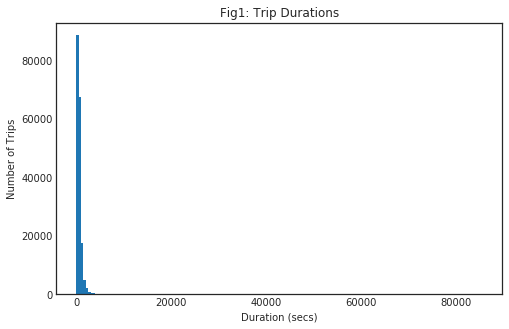

In [18]:
#A look at the dependent variable - trip duration
bin_width = 500
sb.set_style('white')
bins = np.arange(0, df1['duration_sec'].max()+bin_width, bin_width)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.title('Fig1: Trip Durations')
plt.xlabel('Duration (secs)')
plt.ylabel('Number of Trips')
plt.show()

**Observation**: The data points seem to be sparsely distributed where duration is above approx 5000secs. 

**Question** How can the distribution be viewed clearly 

I will set the xmax limit to 5000 using plt.axis, in order to achieve this

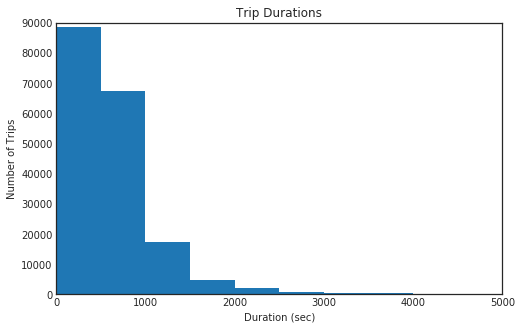

In [19]:
#A Replotting with set xlim

bin_width = 500
bins = np.arange(0, df1['duration_sec'].max()+bin_width, bin_width)
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.title('Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
#set xlim
plt.axis([0,5000,0,90000])
plt.show()

**Observation**: The data appears right skewed which tells us that the peak of the distribution lies towards the left

**Question** How can I see the exact peak of this distribution?

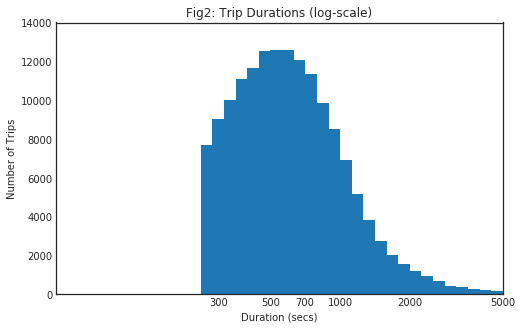

In [20]:
#Transforming to log scale to view the peak
data_log=df1
title_log = 'Fig2: Trip Durations (log-scale)'
axis = [60,5000,0,14000]

##the logtrip function will show the logarithmic distribution of number of trips vs age plot
def logtrip():
    width = 0.05
    bins_log = 10 ** np.arange(2.4, np.log(df1['duration_sec'].max())+width, width)
    plt.figure(figsize=[8, 5])
    plt.hist(data = data_log, x = 'duration_sec', bins = bins_log)
    plt.title(title_log)
    plt.xlabel('Duration (secs)')
    plt.ylabel('Number of Trips')
    plt.xscale('log')
#setting xmin to 60 since the min trip duration is 61
    plt.xticks([300,500,700, 1e3, 2e3, 5e3], ['300','500','700', '1000', '2000', '5000'])
    plt.axis(axis)
    plt.show()
logtrip()

We can see a normal distribution now. A good number of the trips can be seen where the distribution peaks at about 500 to 700 secs (an average of 10mins). 

Number of trips increased with duration from approx 7,500 trips at 250secs to the peak and then falling below 2000 trips for duration below 2000secs

**Now lets take a look at the independent variables mentioned earlier**

**Question**: Do the following affect number of trips taken?

1.Age 

2.User type

3.Gender

4.Station

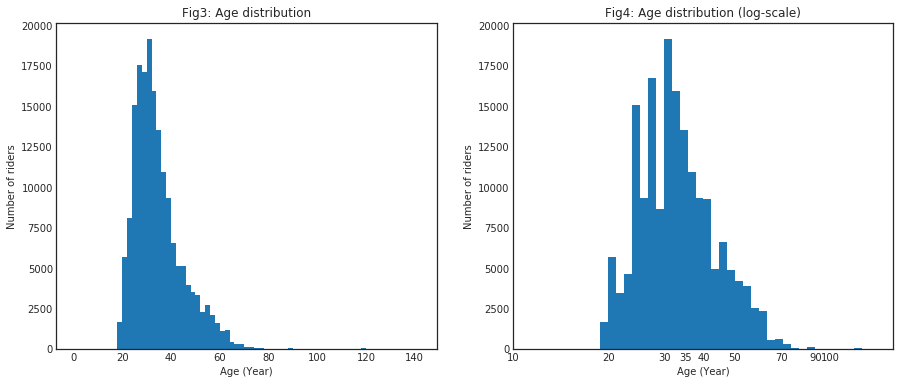

In [21]:
##1.Age
plt.figure(figsize=[15,6])

plt.subplot(1, 2, 1)
#drop null values in age because the ages must be finite for us to plot
df1_age =df1['age'].dropna()
#plotting the distribution
bins = np.arange(0, df1_age.max()+2, 2)
plt.hist(x=df1_age, bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Number of riders')
plt.title('Fig3: Age distribution')

plt.subplot(1, 2, 2)
width = 0.025
bins_log = 10 ** np.arange(1.2, np.log10(df1_age.max())+width, width)
plt.hist(x = df1_age, bins = bins_log)
plt.xscale('log')
ticks = [10,20,30,35,40,50,70,90,100]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels)
plt.xlabel('Age (Year)')
plt.ylabel('Number of riders')
plt.title('Fig4: Age distribution (log-scale)')
plt.show()

The age distribution appears somehow skewed to the right on the normal scale; but the log scale shows a somewhat normal distribution, increasing from 20 year olds and revealing that most rides (about 20000, which is near 11% of total trips) are taken by 34-36 year olds.

After peak, Number of trips gradually reduces with increase in age

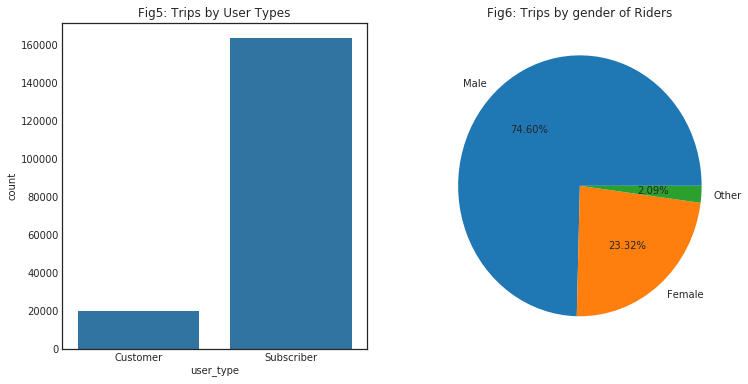

In [22]:
#2 & 3 - user types and gender 
#Using barchart for categorical variables
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'user_type', color = default_color)
plt.title('Fig5: Trips by User Types')

plt.subplot(1, 2, 2)
plt.pie(x=df1['member_gender'].value_counts(),labels=df1['member_gender'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%')
plt.title('Fig6: Trips by gender of Riders')
plt.show()

**It makes sense that there are more subscriber trips as this is more affordable**

A subscriber has a purchase plan while a customer pays per trip they make. Single rides start at 3 dollars per trip, day passes cost ten dollars per day, while memberships cost $25 per month. Source = https://en.wikipedia.org/wiki/Bay_Wheels

For gender, the percentage of total trips taken by men is three times that of women. 

We have "other" gender which constitute a very small amount of trips. These could be non-binary individuals, or riders who did not provide their gender. 

In [23]:
#4-Station
#If some stations are used more than the other, then they would record high number of trips
#So how many stations do we have in all?
print('There are',(df1.start_station_id.nunique()), 'start stations', 'and',(df1.end_station_id.nunique()),'end stations')

There are 329 start stations and 329 end stations


In [24]:
#Out of these 329, which ones are most frequently used - get the names of the top ten start and end stations respectively
top10_start = df1.start_station_name.value_counts().head(10).index
top10_end = df1.end_station_name.value_counts().head(10).index

In [25]:
#locate all observations where the top station exist
top10 = df1.loc[df1['start_station_name'].isin(top10_start)]
end10 = df1.loc[df1['end_station_name'].isin(top10_end)]

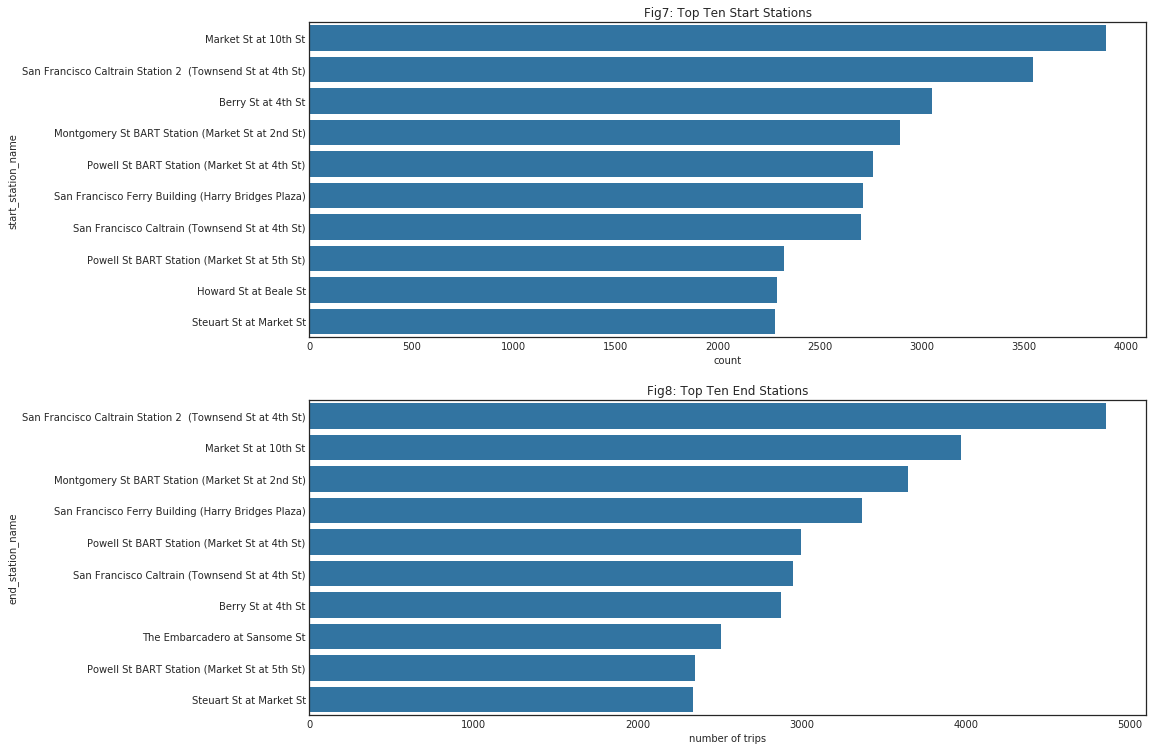

In [26]:
plt.figure(figsize=[15,7])
#adjust subplot layout
plt.subplots_adjust(top=1.5)
plt.subplot(2, 1, 1)
default_color = sb.color_palette()[0]
start_order=top10.start_station_name.value_counts().index
sb.countplot(data=top10, y='start_station_name', color=default_color, order = start_order)
plt.title('Fig7: Top Ten Start Stations')


plt.subplot(2, 1, 2)
end_order=end10.end_station_name.value_counts().index
sb.countplot(data=end10, y='end_station_name', color=default_color, order = end_order)
plt.xlabel('number of trips')
plt.title('Fig8: Top Ten End Stations')
plt.show()

**We can riders use the same stations to start and end their trips with Market St at 10th St and San Francisco Caltrain (Townsend St at 4th St) leading both ways** I wonder why these stations are preferred.

In [27]:
#Are the same set of stations used as start and end terminal?
z = top10_start.intersection(top10_end)
print('Out of the 10 top stations, riders use',(len(z)),'of them as start and stop destinations')

Out of the 10 top stations, riders use 9 of them as start and stop destinations


**Question - Now onto the time variables; what was the day on day trips like for the 28 days in February 2019**

In [28]:
#See the min and max dates to confirm we have 28 days in Feb
df1.day.describe()

count    183412.000000
mean         15.298977
std           8.028187
min           1.000000
25%           8.000000
50%          15.000000
75%          22.000000
max          28.000000
Name: day, dtype: float64

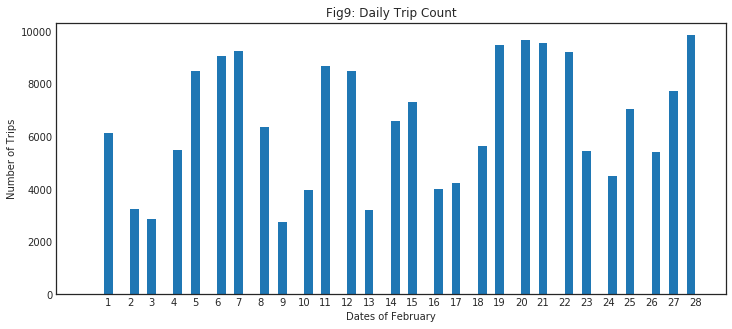

In [29]:
#A histogram of the daily trip count
plt.figure(figsize=[12,5])
bin_width = 0.4
bins = np.arange(0, df1['day'].max()+bin_width, bin_width)
ticks = np.arange(1,29)
plt.xticks(ticks)
plt.hist(data=df1, x='day', bins=bins)
plt.xlabel('Dates of February')
plt.ylabel('Number of Trips')
plt.title('Fig9: Daily Trip Count')
plt.show()

**The distribution appears sinusoidal. Peak days are soon followed by dips like 2nd & 3rd, 9th & 10th, 16th and 17th... A look at Feb 2019 calendar shows these days are weekends [https://www.timeanddate.com/calendar/monthly.html?year=2019&month=2&country=1]

**Question: Could there be fewer trips in the weekends? And what periods of the day do we have the least trips?**

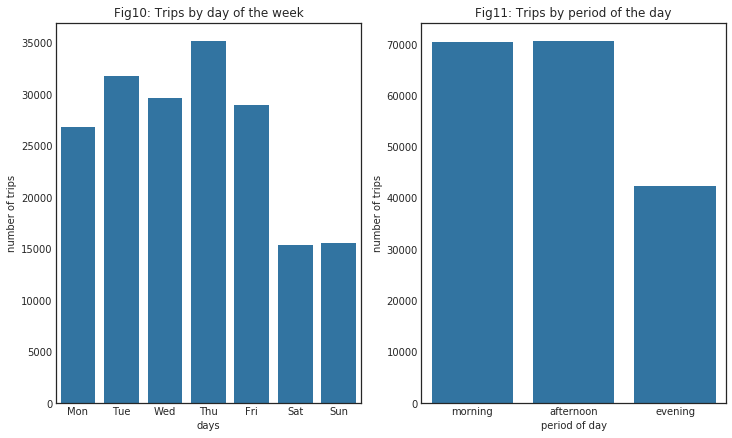

In [30]:
#Time variable - day of week and period
#Using barchart for categorical variables
plt.figure(figsize=[12,7])
plt.subplot(1, 2, 1)
default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'week', color = default_color)
plt.xlabel('days')
plt.ylabel('number of trips')
plt.title('Fig10: Trips by day of the week')
plt.subplot(1, 2, 2)
sb.countplot(data = df1, x = 'period', color = default_color)
plt.xlabel('period of day')
plt.ylabel('number of trips')
plt.title('Fig11: Trips by period of the day')
plt.show()

Mornings and afternoons seem to be rush hours. I have also confirmed that there are more trips during the weekdays and less trips during the weekends, and that is not out of place. We can infer that riders use the bikes to commute to work.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Log scale transformation on the trip duration showed a unimodal peak occurs at 500-700secs. Age distribution on log scale was multimodal between 30-40 years, with the highest at 35 years.

> There are more trips during the day than in the weekend with peak on Tuesdays and Thursdays

> Subscribers and Males take more trips than Customers and Females. But I would like to know which group made the longest

> Daytime seem to be rush hours. That follows common understanding

>Out of the ten frequently used stations, 9 of them happen to be preferred as both start and stop terminals

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Wrangling operations included extracting time variables which I used for my visualizations, and subsetting data such as top start and end stations

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in this data.

**Question**: What is the relationship between age and trip duration?

The number of trips and age measure are discrete variables. To avoid overplotting, I will use a heatmap

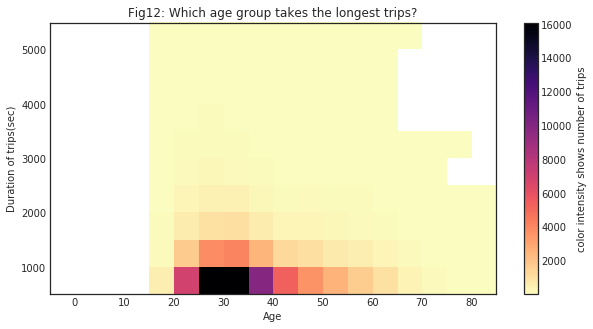

In [31]:
plt.figure(figsize=[10,5])
bins_y = np.arange(500, 5000+1000, 500)
bins_x = np.arange(-5, 85+1, 5)
h2d = plt.hist2d(df1['age'], df1['duration_sec'], cmin=0.5, cmap='magma_r',
           bins = [bins_x, bins_y])
plt.colorbar(label = 'color intensity shows number of trips')
plt.xlabel('Age')
plt.ylabel('Duration of trips(sec)')
plt.title('Fig12: Which age group takes the longest trips?')
plt.show()

From the plot above, higher duration is clocked by younger members between ages 20-40 with intensity in the 30s.

**Question** Now a look at the user type and gender. Do these impact duration too?

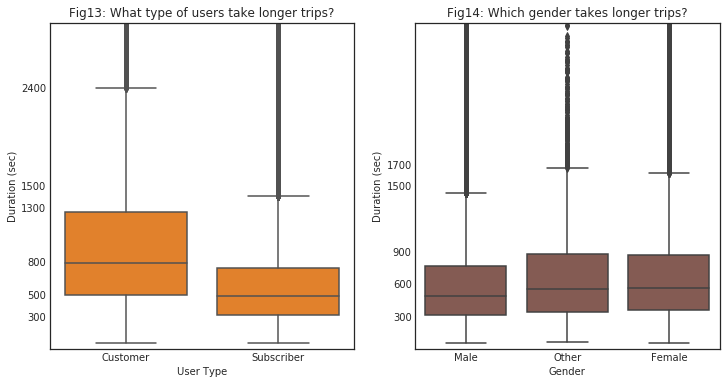

In [32]:
plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[1]
sb.boxplot(data = df1, x = 'user_type', y = 'duration_sec', color = base_color)
#Because values a widespread, ymax will be set to 3000 for a zoom in view
plt.ylim([0, 3000])
plt.yticks([300,500,800,1300,1500,2400])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Fig13: What type of users take longer trips?')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[5]
sb.boxplot(data = df1, x = 'member_gender', y = 'duration_sec', color = base_color)
#Because values a widespread, ymax will be set to 3000 for a zoom in view
plt.ylim([0, 3000])
plt.yticks([300,600,900,1500,1700])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Fig14: Which gender takes longer trips?')
plt.show()

We can see that customers generally spend longer time on trips than subscribers even though subscribers have higher count. However, upper limit in the Q3 of customers does not exceed (1800 secs, 30min). Customers are alloted 30min per trip.

Females and Others spend more time also than males who use the bike share service the most. But the spread of data for Others seem larger. I am now interested in why 'Others' have such high duration of trips. I will check this again with a barplot as it also estimates central tendency (mean) and indicates spread with minimal space

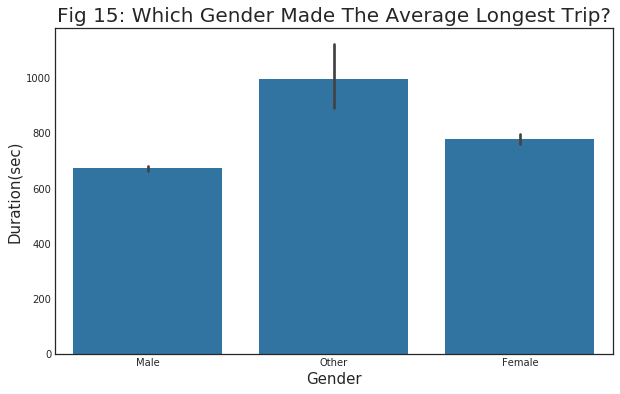

In [33]:
data=df1
title = "Fig 15: Which Gender Made The Average Longest Trip?"
def gender_trip():
    fig =plt.figure(figsize=(10,6))
    sb.barplot(data=data, x='member_gender', y='duration_sec', color=default_color)
    plt.title(title, fontsize =20)
    plt.xlabel("Gender", fontsize =15)
    plt.ylabel("Duration(sec)", fontsize =15)
    plt.show()
gender_trip()

Male and female on the average take longest rides between 600-800secs (10-13mins); men being at the lower end with very smaller spread as indicated by the error bars

The Other group take the longest trips on the average (close to 1000 secs) with the largest data spread. Its error bar does not over lap with any of the groups suggesting significance in the difference

**Question: Do these Others group keep the bike for over a day? i.e 8640secs**

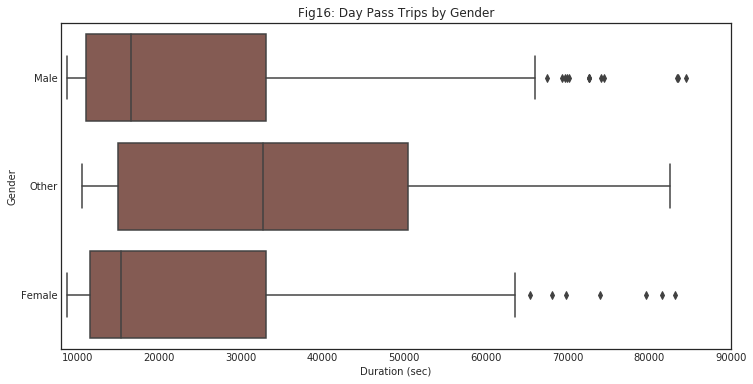

In [34]:
#subsetting the duration equal to a day
plt.figure(figsize = [12, 6])
day_pass = df1[df1['duration_sec'] > 8639]
base_color = sb.color_palette()[5]
sb.boxplot(data = day_pass, x = 'duration_sec', y = 'member_gender', color = base_color)
#setting the limit for better view
plt.xlim(8000,90000)
plt.xlabel('Duration (sec)')
plt.ylabel('Gender')
plt.title('Fig16: Day Pass Trips by Gender')
plt.show()

Waoh, They have higher duration in the region of 3,000 -5000 secs as seen in the box plot (fig 15) which is not common for males and females. The median value of the Other gender is at 3000 which is same as the Q3 upper limit of both male and female. Points in the Q4 range of others are distributed such that there are no 'outliers' after the last whisker

Worthy of note also is that: from the data supplied, missing birth year count corresponds to number of missing gender values. 

In [35]:
print('There are', (df1[df1['member_gender'].isnull()].shape[0]), 'gender null values and',
      (df1[df1['member_birth_year'].isnull()].shape[0]), 'birth year null values')

There are 8265 gender null values and 8265 birth year null values


In [36]:
#Could both the gender and birth be simultaneously missing for the a trip?
#--- subsetting missing gender dataframe
missing = df1[df1['member_gender'].isnull()]
#checking for the unique birth years
missing['member_birth_year'].unique()

array([ nan])

The above returns an empty list! 

So this Others group contribute well to the number of riders who keep the bikes for over a day, yet they do not capture personal information. I think this is not proper for security and traceability purposes.

**Question**: In which of the top stations do we have this group concentrated. What periods do we have high usage of these stations?

In [37]:
# Prepare lists of  categorical variables to help answer these questions
time_variable = ['period','week']
user_category = ['user_type','member_gender']

In [38]:
# Prepare a list of the top stations identified
top_stations = ['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 4th St)',
       'Howard St at Beale St']
#locate the dataframe of these stations
stations_df = df1.loc[df1['start_station_name'or 'end_station_name'].isin(top_stations)]

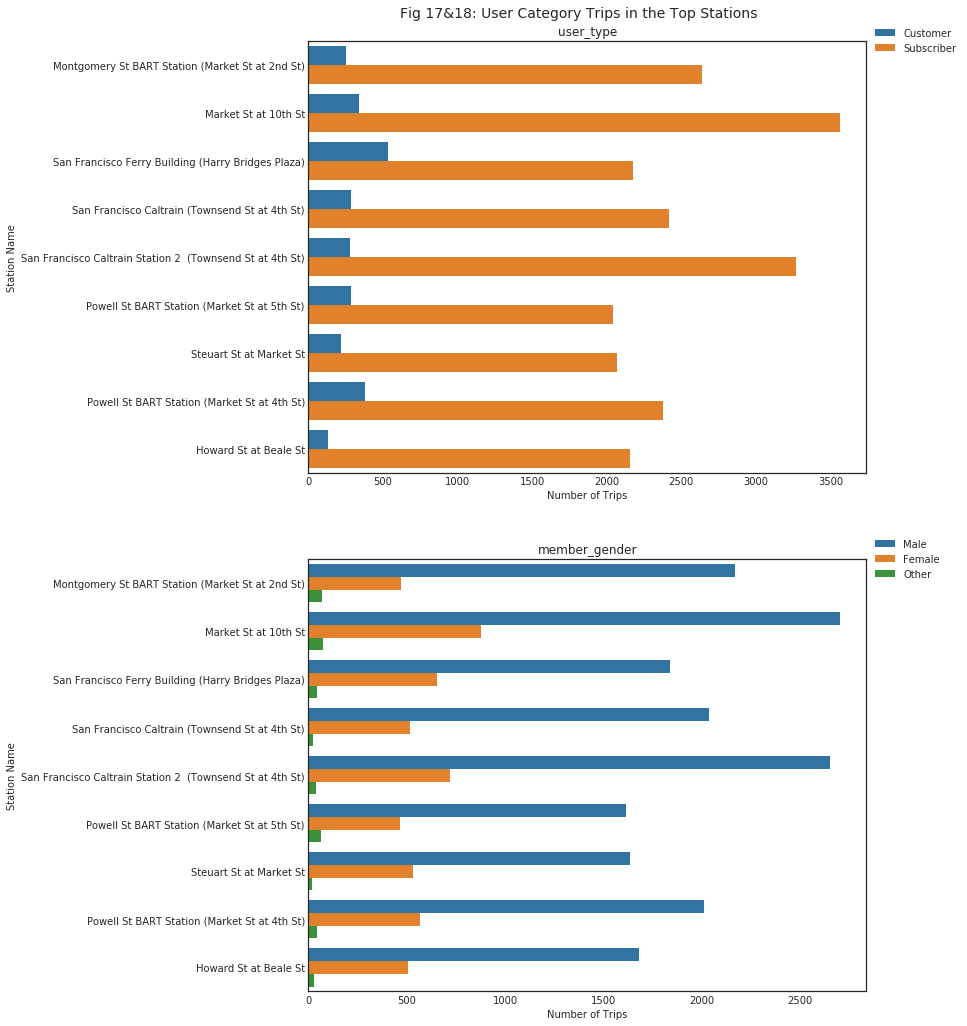

In [39]:
#Visualize user category trips in the top stations
fig = plt.figure(figsize=(10,16))
#adjust subplot layout
plt.subplots_adjust(top=0.95)
fig.suptitle('Fig 17&18: User Category Trips in the Top Stations', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i) #subplot cannot take '0', so range has to start from 1 to 3
    sb.countplot(data=stations_df, y='start_station_name', hue=user_category[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,1))
    plt.ylabel('Station Name')
    plt.xlabel('Number of Trips')
    plt.title(user_category[i-1]);

**All stations have more trips by males and by subscribers as noted earlier**

San Francisco Ferry Building (Harry Bridges Plaza) has the highest number of Customer subscription slighlty

**Trips by 'Others' group are present in all stations with:** 

Montgomery St BART Station (Market St at 2nd St), 

Market St at 10th St, 

and Powell St BART Station (Market St at 4th St), in the lead

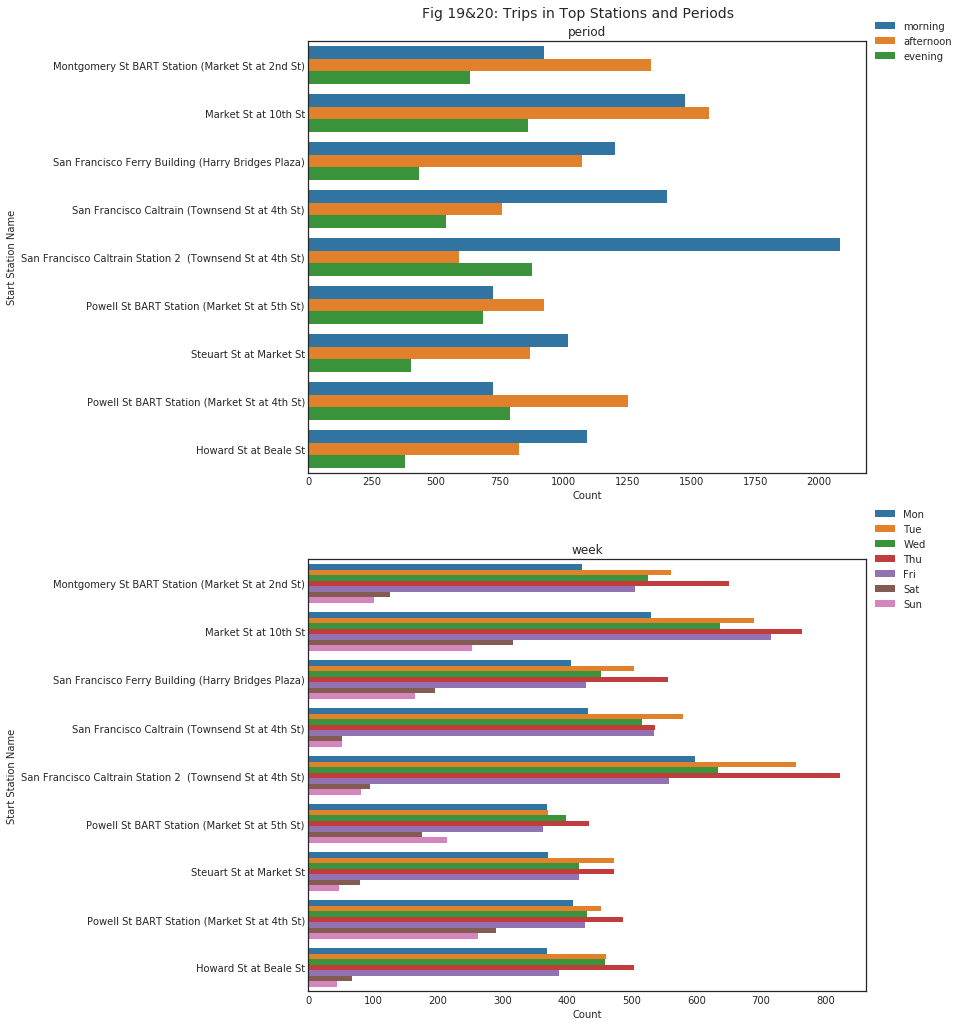

In [40]:
#visualize trips in the top stations by periods
fig = plt.figure(figsize=(10,16))
#adjust subplot layout
plt.subplots_adjust(top=0.95)
fig.suptitle('Fig 19&20: Trips in Top Stations and Periods', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i) #subplot cannot take '0', so range has to start from 1 to 3
    sb.countplot(data=stations_df, y='start_station_name', hue=time_variable[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,1))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count')
    plt.title(time_variable[i-1]);

**Period**: As opposed to the general observation, mornings are not the peak periods for all the top stations. Interesting to note that:

1. Powell St BART Station (Market St at 4th St) has more evening trips than morning

2. San Francisco Caltrain Station 2  (Townsend St at 4th St) has more evening than afternoon trips

**Day**:  Consistent with earlier findings, trips peak on Tuesdays and Thursdays. Fewer trips are seen on weekends

Question: Time variable has not revealed why these stations are preferred. Let me check their locations/proximity. 

A library like geopandas is best built for this, but I will improvise with a scatter plot

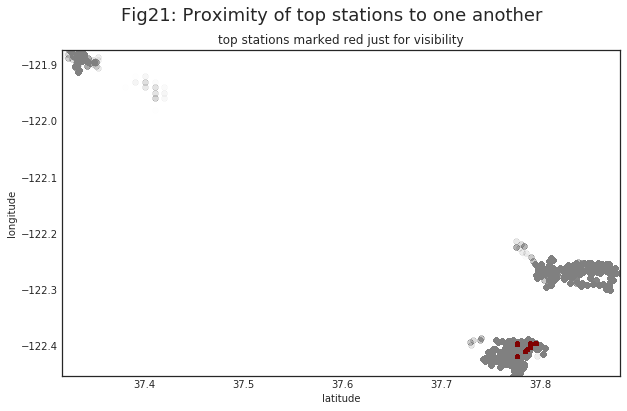

In [41]:
fig = plt.figure(figsize=(10,6))
#locate the top stations
plt.scatter(x=stations_df['start_station_latitude'], y=stations_df['start_station_longitude'],c='red', s=12,marker='p')
#plot other stations
plt.scatter(data=df1, x='start_station_latitude', y='start_station_longitude',c='grey',alpha=1/500)
#set limits from the dataset
plt.xlim(df1['start_station_latitude'].min()-0.001, df1['start_station_latitude'].max())
plt.ylim(df1['start_station_longitude'].min(),df1['start_station_longitude'].max())
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.suptitle('Fig21: Proximity of top stations to one another', fontsize=18)
plt.title('top stations marked red just for visibility');

Now we can see at the bottom left of the plot that all the top stations are close to one another

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Duration - Age; trip duration seem to decrease with age increase, but we know from the univariate exploration of age data that a large number of the trips recorded were by 25-40 year olds. We could say that the under representation of the aged population in the dataset is a factor for this negative correlation

>2.Number of trips: Looking at a subset of the top nine stations with the highest trips, mornings turned out to not the peak period throughout, as opposed to the general trend in the whole dataset 

>3. Users: Customers and Females spend longer time on trips than Subscribers and Males even though the latter pair take more trips. I can understand why Subscribers can take shorter trips, they are not paying per ride, unlike customers who would want to utilize the time well. But I don't know why this is so for men

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The gender group termed "Others" seem to be be people who left out personal information when booking the ride, and they keep the bikes for over a day more often than males and females who are identified.

## Multivariate Exploration

>In this section, I will create plots of three or more variables to investigate my findings even further.

>My subset of focus would be the top stations. I am interested in how the categorical variables (user type, gender), and the quantitative variable (age), interact with one another and in turn, the variable of interest (trip duration)

In [42]:
#defining a function for creating heat maps in the FaceGrid
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(500, 7000+1000, 500)
    bins_x = np.arange(-5, 85+1, 5)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.colorbar()

**I will show age vs duration for each gender-usertype combination in a heat map grid**

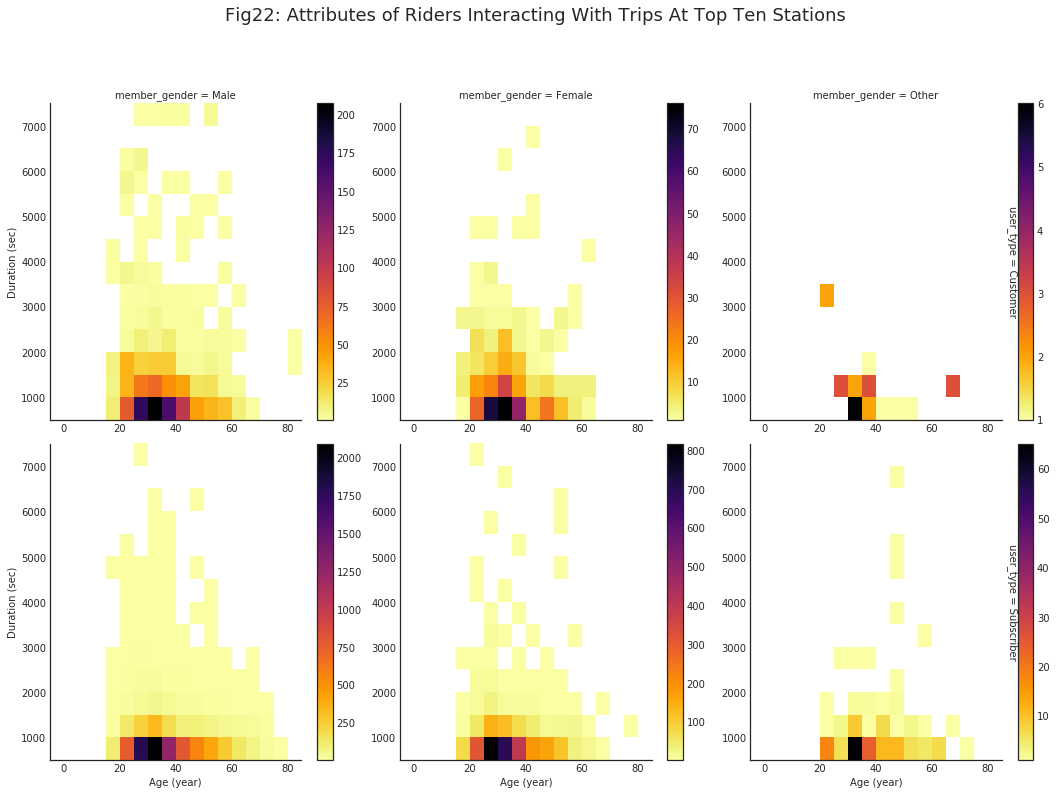

In [43]:
data_grid = top10
sb.set_style('white') 
xlim = [17, 80]
ylim = [60, 90000]
suptitle = 'Fig22: Attributes of Riders Interacting With Trips At Top Ten Stations'

#all_attribute function shows the trip duration vs age for the different genders and user types in a 2D heat map.
#It is also dependent on hist2dgrid() function
def all_attributes():
    fig = plt.figure(figsize=(10,7))
    plt.subplots_adjust(top=1.0)
    g = sb.FacetGrid(data = data_grid, col = 'member_gender', row = 'user_type', size = 5, margin_titles = True, 
                xlim =xlim, ylim=ylim)
    g.map(hist2dgrid, 'age', 'duration_sec', color='inferno_r')
    g.set_xlabels('Age (year)')
    g.set_ylabels('Duration (sec)')
    plt.suptitle(suptitle, y=1.1, fontsize=18)
    plt.show()
all_attributes()

### Observations

> From the colorbar, it is easy to tell that there are more subscriber trips than customer trips for all the genders

> 'Other' gender who are customers have relatively peak duration and number of trips for riders who are between 60-70. However, the data on that is not sufficient to make any inference

>For both user types, the ages of women reduce greatly after 60years

**Question: Now which gender has the most trip duration, and in what user type?**

To answer this, I will review the univariate trip distribution for the top stations

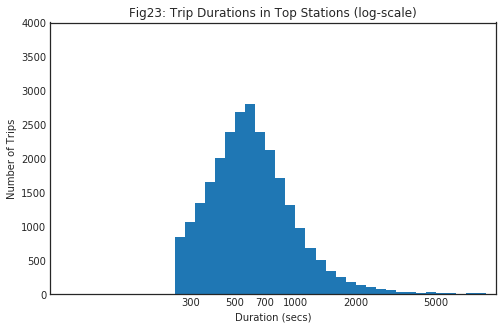

In [44]:
axis = [60,10000,0,4000]
data_log=top10
title_log = 'Fig23: Trip Durations in Top Stations (log-scale)'
#calling logtrip function
logtrip();
#It shows trip count drop significantly into 2000secs

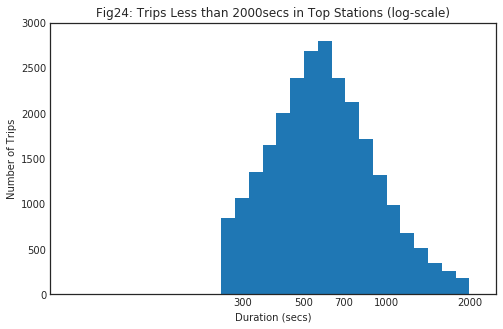

In [45]:
#Subsetting duration less than 2000 becasue trip counts are really small after then 
top10_2000 = top10[top10['duration_sec']<2000]
axis = [60,2500,0,3000]
data_log=top10_2000
title_log = 'Fig24: Trips Less than 2000secs in Top Stations (log-scale)'
#calling logtrip function
logtrip()

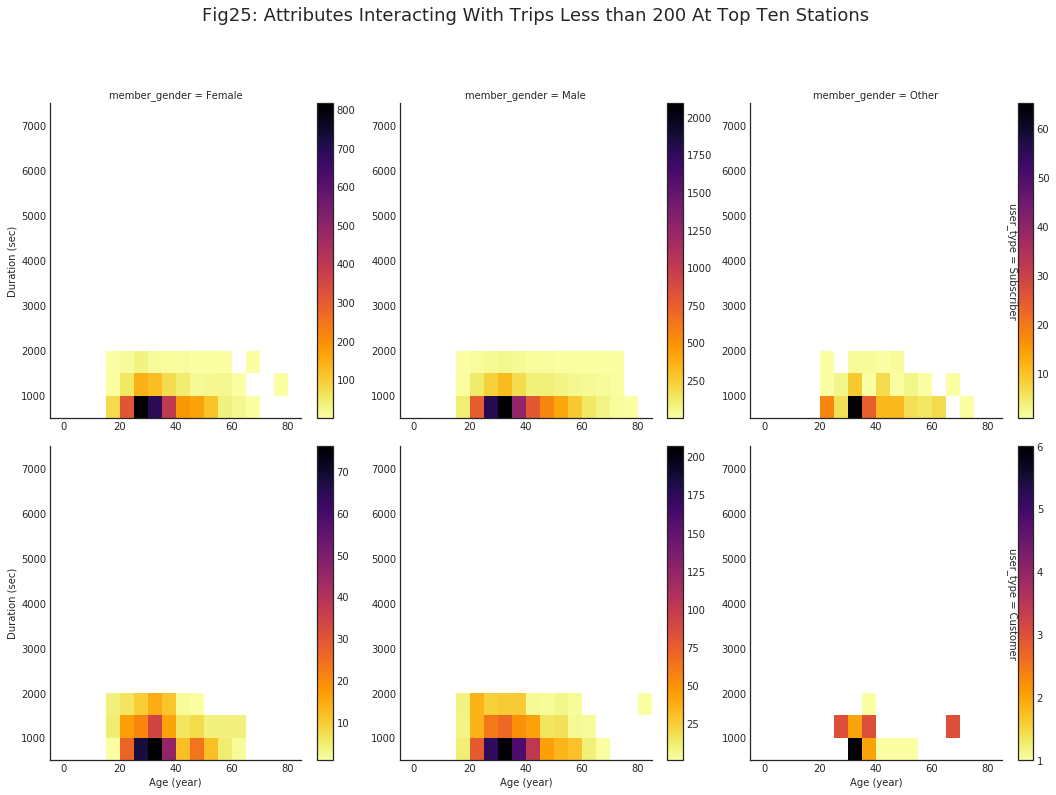

In [46]:
#Subsetting for duration less than 2000 becasue trip counts are really small after then
top10_2000 = top10[top10['duration_sec']<2000]

#plot hist2d to show attributes interaction for duration less than 2000
suptitle ='Fig25: Attributes Interacting With Trips Less than 200 At Top Ten Stations'
data_grid = top10_2000
sb.set_style('white')
all_attributes()

>Number of trips are in the order: Men > Women > Other, looking at the colorbar

> It would be easy to assume men take longer trips because of the more bins for males than females in the upper region of the plot especially towards the aged group (>60), the color intensity does not really give much info

>I will investigate this further using an estimate of central tendency represented in a line plot for each age level. Let me first see the general average in a bar plot

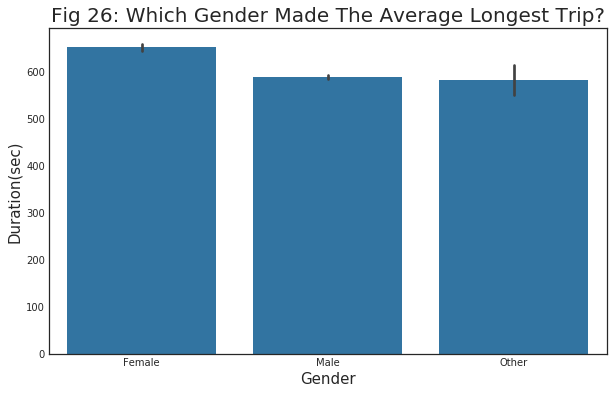

In [47]:
data=top10_2000
title = "Fig 26: Which Gender Made The Average Longest Trip?"

gender_trip()

Well, who run the world...?

Females have the longest trip - confirmed in the subset sample of focus. The male gender is just a little higher than Others. But Others still have a large spread of data

**Question - At what ages do trip duarations peak for each gender**

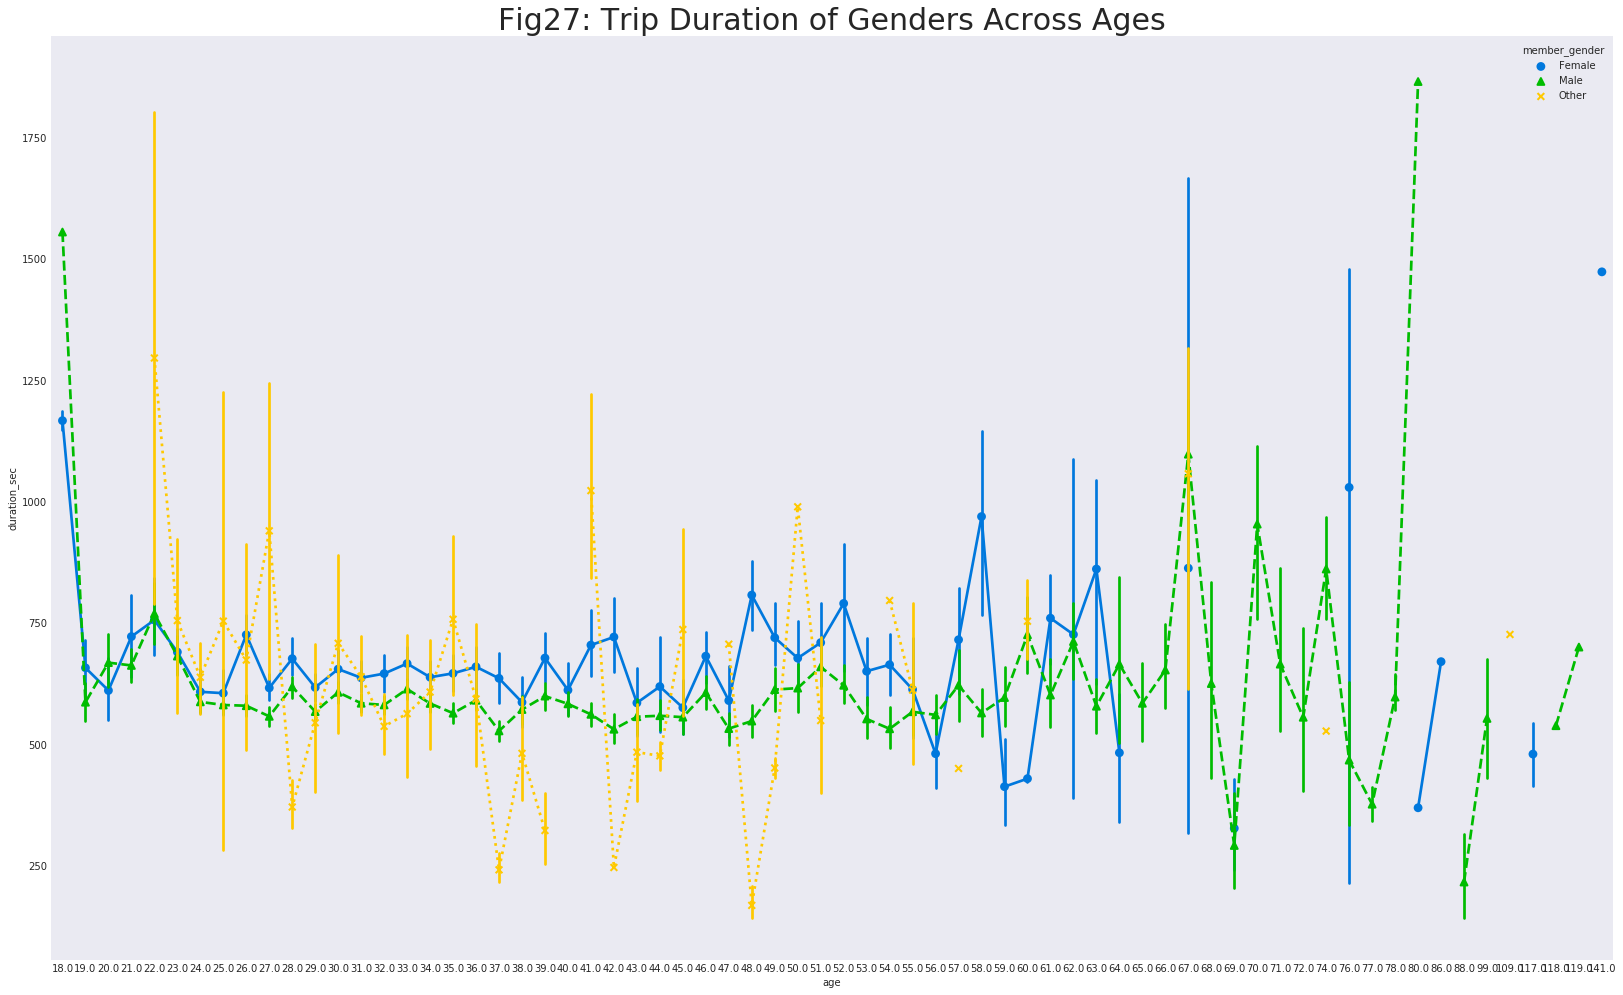

In [48]:
#Lineplot to investigate relationship between age and trip duration for each gender further
title = 'Fig27: Trip Duration of Genders Across Ages'
hue = 'member_gender'
def line():
    fig = plt.figure(figsize=(28,17))
    sb.set_style('dark')
    k = sb.pointplot(data=top10_2000, x='age', y='duration_sec', hue=hue, 
             linestyles=["-", "--",":"], palette="nipy_spectral",  markers=["o","^","x"])
    plt.title(title,  fontsize=30)

    plt.show()
line()

Female trips are above men trips almost throughoutage 56+ where it starts to vary. We also see fewer women from age 65. Male trips dominate the rest two with an unusual peak at 80years

The duration for Others is irregular, touching highs and low around both the male and female distribution; this is the reason for the spread of data observed

I have looked at gender in age-trip relationship. Let me consider the role of user-type. 

**Question: Which usertype has the longest trips in this subset of data?**

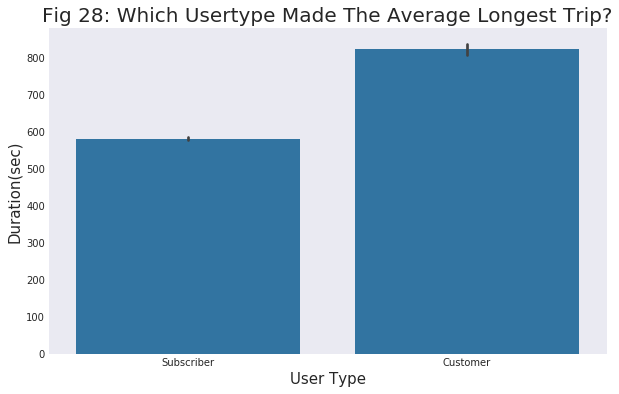

In [49]:
data=top10_2000
title = "Fig 28: Which Usertype Made The Average Longest Trip?"
def usertype_trip():
    fig =plt.figure(figsize=(10,6))
    sb.barplot(data=data, x='user_type', y='duration_sec', color=default_color)
    plt.title(title, fontsize =20)
    plt.xlabel("User Type", fontsize =15)
    plt.ylabel("Duration(sec)", fontsize =15)
    plt.show()
usertype_trip()

Customers have the highest average trip duration. Lets look at how gender comes in. After that, we'll bring in age using a lineplot

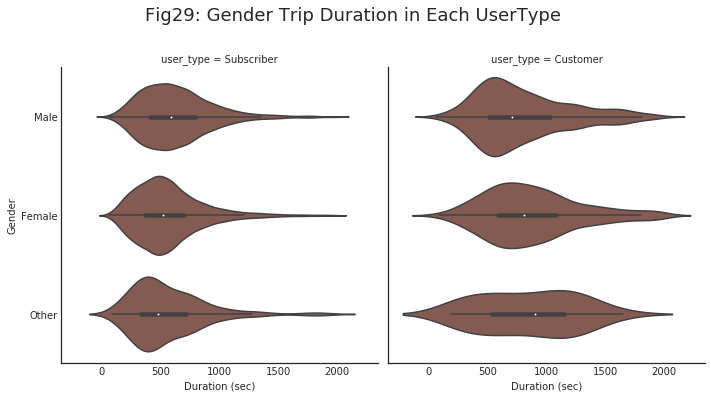

In [51]:
#violinplot plot to investigate relationship between gender and trip duration for each user_type
def violin_plot():
    sb.set_style('white')
    fig = plt.figure(figsize=(10,7))
    g = sb.FacetGrid(data = top10_2000, col = 'user_type', col_wrap = 2,  size = 5)
    g.map(sb.violinplot, 'duration_sec', 'member_gender',  color=base_color)
    g.set_xlabels('Duration (sec)')
    g.set_ylabels('Gender')

    plt.suptitle(('Fig29: Gender Trip Duration in Each UserType '), y=1.1, fontsize=18)
    plt.show()
violin_plot()

The trend is inline with earlier observations; there are longer customer trips than subscribers. 

At subscriber level, trip distributions are similar; with modal pounts at 400-600 secs but males tend to have longer trip durations in this category because the inner dot which signifies the median is higher than the two other groups

This suggests the order: Male > Female > Other for Subscriber category

At customer level, Other gender has an almost even, but slightly bimodal distribution through the trip durations. We can tell the data is not centered

Males still peak at 500secs while females have more points between 500-1000secs

This suggests the reverse
order: Other > Female > Male for Customer category

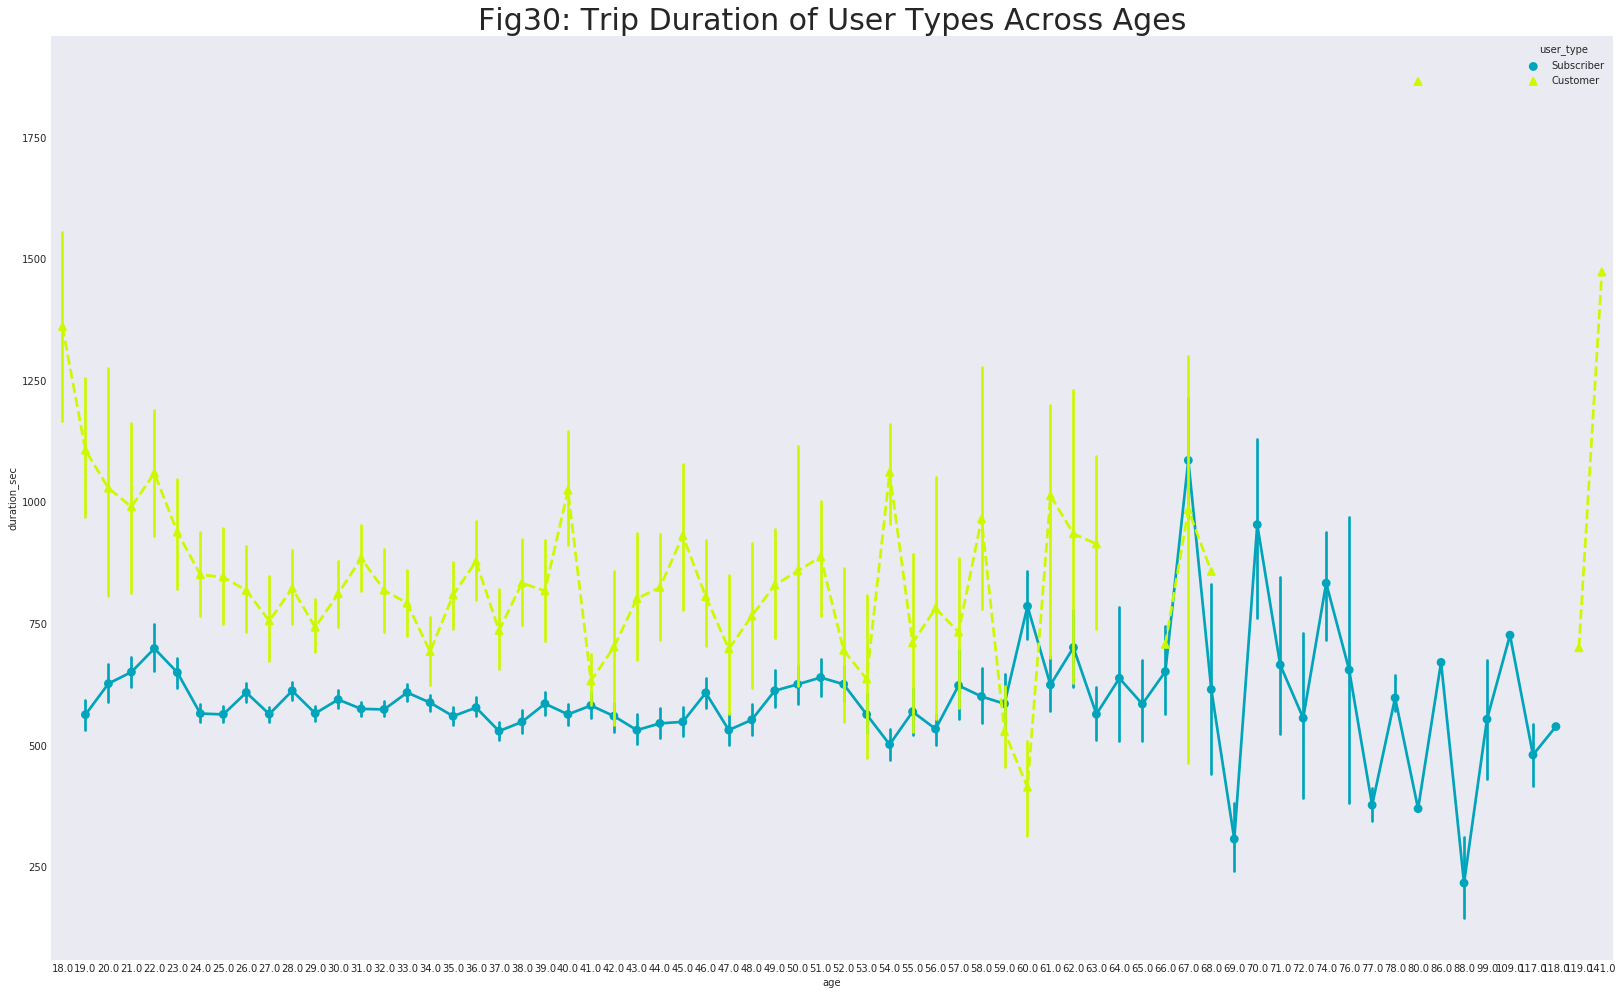

In [52]:
#Showing trip duration of usertype with age
title = 'Fig30: Trip Duration of User Types Across Ages'
hue = 'user_type'

line()

Customers consistently clock higher durations until age 60 were we see a significant dip. Outlier values for customers are at the lowest (18years) and highest(141 years) age limits.

Subscribers start to experience peak and fall from age 60

We can infer that age 60+ use the bikes for exercise-related reasons and errands, hence the unpredicatbility of the duration. 

Younger people could just commute to work with it

### Additional plots - Univariate

>Just to glance through

1. Reconfirm males and subscribers made the most trips

2. the composition of usertypes in each gender

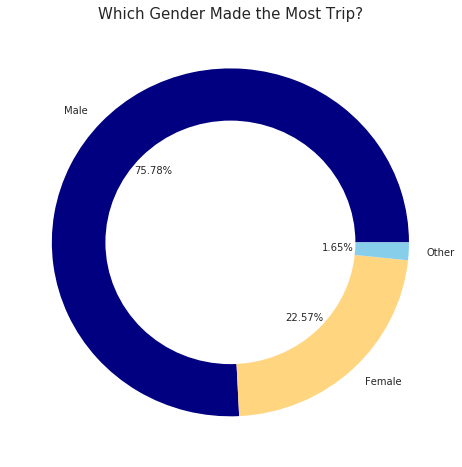

In [53]:
#1 Piechart shows men made the most trips 75.78%
colors = ['#000080', '#FFD580', '#87CEEB']
def gentrip():
    fig = plt.figure(figsize=(8,8))
    plt.pie(x=top10_2000['member_gender'].value_counts(),labels=top10_2000['member_gender'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%', colors =colors)
    #draw circle 
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    #get the current figure
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.title('Which Gender Made the Most Trip?', fontsize =15)    
          
gentrip()

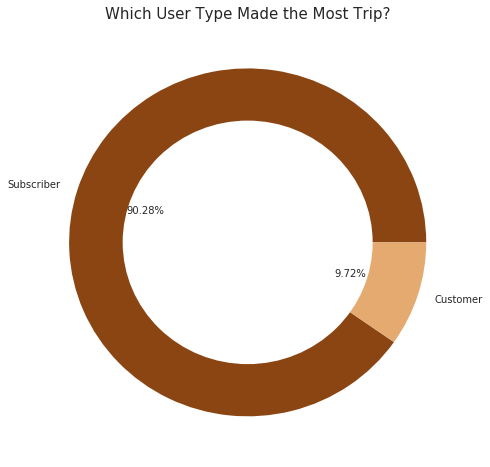

In [54]:
colors = ['#8B4513', '#E5AA70']
def usertrip():
    fig = plt.figure(figsize=(8,8))
    plt.pie(x=top10_2000['user_type'].value_counts(),labels=top10_2000['user_type'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%', colors =colors)
    #draw circle 
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    #get the current figure
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.title('Which User Type Made the Most Trip?', fontsize =15)
    plt.show()
usertrip()

In [55]:
#Subset dataframes for each gender separately 
males = top10_2000[top10_2000['member_gender']=='Male']
females = top10_2000[top10_2000['member_gender']=='Female']
others = top10_2000[top10_2000['member_gender']=='Other']
#then plot piecharts to see their usertype compostion

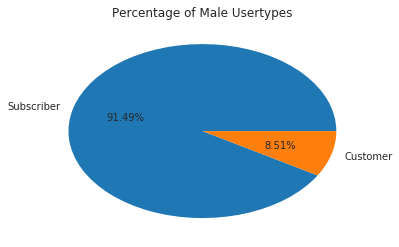

In [56]:
#2 Percentage of Male Usertypes
plt.pie(x=males['user_type'].value_counts(),labels=males['user_type'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%')
plt.title('Percentage of Male Usertypes')
plt.show()


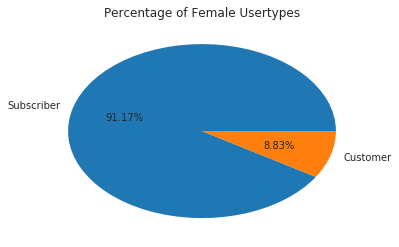

In [57]:
# Percentage of Female Usertypes
plt.pie(x=females['user_type'].value_counts(), labels=females['user_type'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%')
plt.title('Percentage of Female Usertypes')
plt.show()

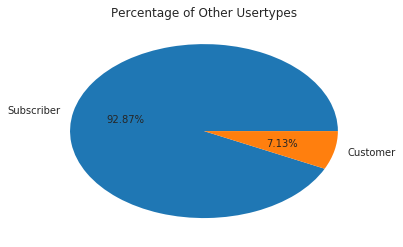

In [58]:
#4 Percentage of Other Usertypes
plt.pie(x=others['user_type'].value_counts(),labels=others['user_type'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%')
plt.title('Percentage of Other Usertypes')
plt.show()

Hmmm, even though females make up just about 23% of total trips, they have the highest preference for being customers(8.83%)

Recall from fig 30 that the number of customer trips begin to dwindle from age 60

Recall also from fig 25 that the number of female trips from age 60+ reduce

**Connecting the dots... Females also make up a high number of customer trips, and there are more female customer trips below 60 than there are above the same age, hence the reduction in customer trips from ages 60 and above.**
                                                                                                                    

### Some of the relationships you observed in this part of the investigation. 

>For both user types, the ages of women reduce greatly after 60years

>Overall, women made the highest trip durations across almost all ages 

>The concentration of trips in 25-40 age group for all genders and user types could suggest it is used as commute to workplaces in the region while the older group may just use cycling as a form of exercise


### Were there any interesting or surprising interactions between features?

> The duration for Others is irregular across all ages in the top stations

>Order of trip duration for Subscriber category:

>    **Male > Female > Other**

>Order of trip duration for Customer category is reversed:

>    **Other > Female > Male**

## Insights

**After examining the distribution of the individual variables in this dataset, I discovered that most trips were: between 500 -600secs; taken by 25-40 year olds; by subscribers; also by males; during daytime; and more on weekdays than weekends.**

>A deeper dive into the stations with the highest number of trips revealed thus:

**Gender: Men made the highest number of trips, women clocked more trip durations across almost all ages.** 

>Perhaps there are more men than women living in the region with the top stations of San Francisco Bay area, hence the high occurrence

**Age: The concentration of trips in 25-40 age group for all genders and user types could suggest it is used as commute to workplaces in the region while the older group may just use cycling as a form of exercise**

>The ages of women reduce greatly after 60years. Not only are there fewer women, there aren't many older ones

**User Type: Length of trip duration for for Subscriber category: Male > Female > Other, is a reverse of Customer category: Other > Female > Male**


## Limitations

>As there is insufficient data on women (three times less than men) and other gender. It would be difficult to draw a final conclusion. Additional data is required

>The Other gender group took trips over a day, with irregular duration across all ages - who are they? no data on birth year too.

>Sample size were stations close to one another, behavior may differ for stations not close


In [59]:
#Save the dataest used for final analysis
top10_2000.to_csv('fordgobike_clean', index=False)